Mean Squared Error on Training Data: 94.71492098076308
Mean Squared Error on Test Data: 107.14941234807297


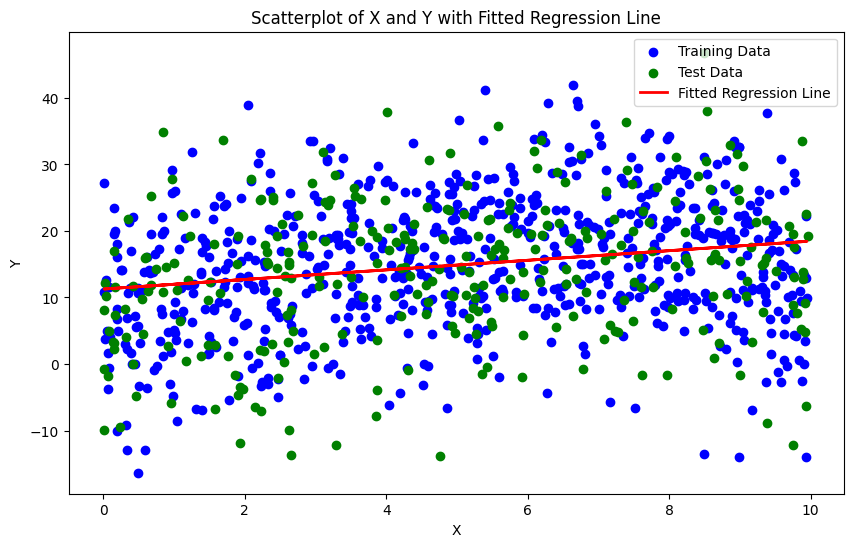

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Simulate data
np.random.seed(442)  # For reproducibility
X = np.random.rand(1000, 1) * 10  # X values between 0 and 10
true_slope = 2.5
true_intercept = 5
true_sq = 0.2
true_tr = -0.04
noise = np.random.randn(1000, 1)*10  # Random noise
Y = true_slope * X + true_intercept + true_sq * X * X + true_tr * X * X * X + noise

# Step 2: Split the data into training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Step 3: Estimate the relationship using linear regression on the training data
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Step 4: Calculate Mean Squared Error (MSE) for both training and test datasets
mse_train = mean_squared_error(Y_train, Y_pred_train)
mse_test = mean_squared_error(Y_test, Y_pred_test)

print(f"Mean Squared Error on Training Data: {mse_train}")
print(f"Mean Squared Error on Test Data: {mse_test}")

# Step 5: Plot the scatterplot and the fitted regression line
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate 100 points for X
Y_plot = model.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], Y_train, color='blue', label='Training Data')
plt.scatter(X_test[:, 0], Y_test, color='green', label='Test Data')
plt.plot(X_train, Y_pred_train, color='red', linewidth=2, label='Fitted Regression Line')
#plt.plot(X_plot, Y_plot, color='red', linewidth=2, label='Fitted Polynomial Regression Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X and Y with Fitted Regression Line')
plt.legend()
plt.show()

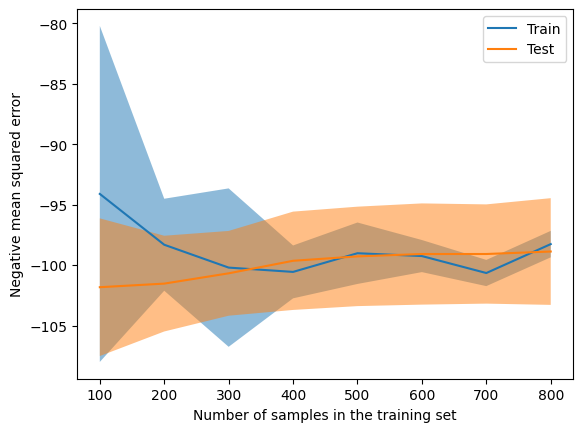

In [11]:
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
LearningCurveDisplay.from_estimator(
  LinearRegression(), X, Y, scoring='neg_mean_squared_error', train_sizes=[100, 200, 300, 400, 500, 600, 700, 800], cv=5)